In [11]:
import numpy as np

In [13]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [18]:
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

In [21]:
df.shape

(349, 10)

In [16]:
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

In [18]:
df.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [20]:
print(df.isnull().values.any())

False


In [22]:
df = df.drop_duplicates()

In [23]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


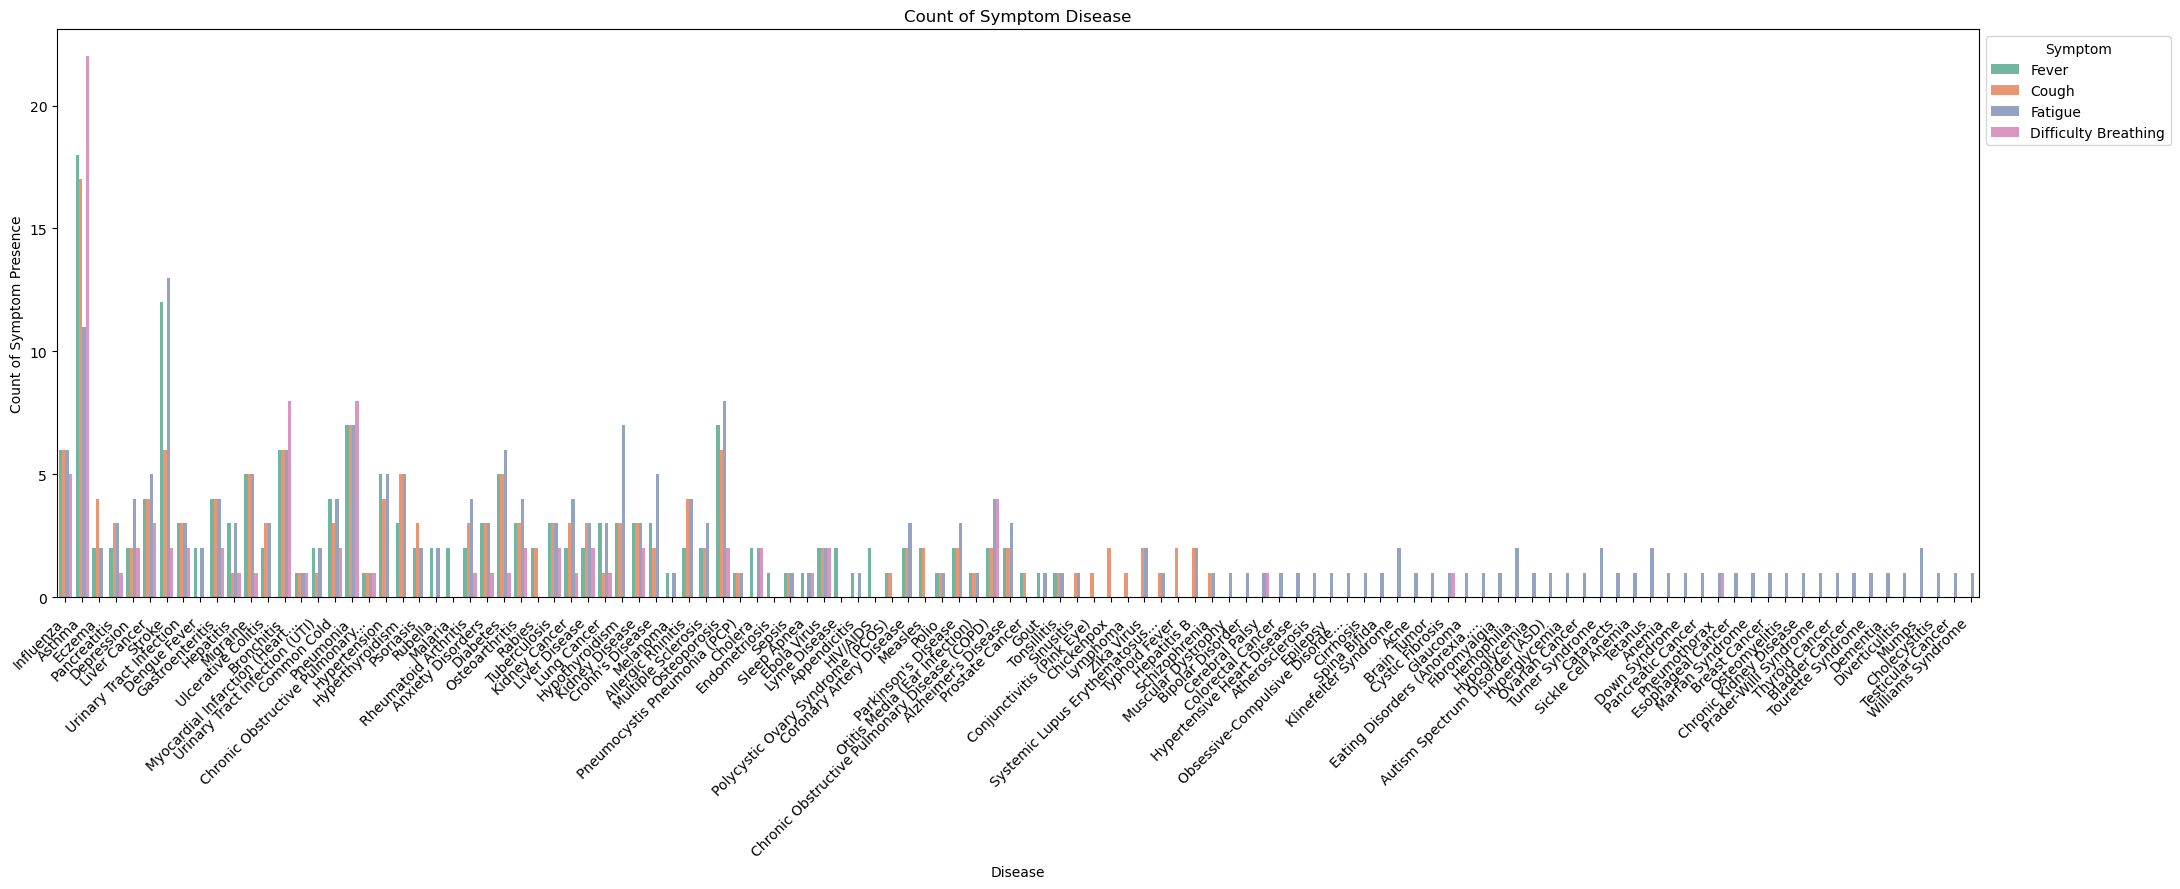

In [39]:
symptoms = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure', 'Cholesterol Level']
df_binary = df.copy()
df_binary[symptoms] = df_binary[symptoms].replace({'Yes': 1, 'No': 0})
df_melted = df_binary.melt(id_vars="Disease", value_vars=symptoms, var_name="Symptom", value_name="Presence")
df_present = df_melted[df_melted['Presence'] == 1]

plt.figure(figsize=(20, 9))
sns.countplot(x="Disease", hue="Symptom", data=data_present, palette="Set2")
plt.title("Count of Symptom Disease")
plt.xlabel("Disease")
plt.ylabel("Count of Symptom Presence")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().tick_params(axis='x', which='major', pad=10)
plt.tight_layout()
plt.legend(title="Symptom", bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



In [182]:
X = data[['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']]
y = data['Disease']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [186]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [156]:
y_pred = rf_model.predict(X_test)


In [160]:
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 8.57%


In [166]:
print(classification_report(y_test, y_pred, zero_division=0))

                                              precision    recall  f1-score   support

                           Allergic Rhinitis       0.00      0.00      0.00         2
                                      Asthma       1.00      0.56      0.71         9
                              Bladder Cancer       0.00      0.00      0.00         1
                                 Brain Tumor       0.00      0.00      0.00         1
                               Breast Cancer       0.00      0.00      0.00         1
                                  Bronchitis       0.00      0.00      0.00         2
                                     Cholera       0.00      0.00      0.00         1
Chronic Obstructive Pulmonary Disease (COPD)       0.00      0.00      0.00         1
                                   Cirrhosis       0.00      0.00      0.00         1
                           Colorectal Cancer       0.00      0.00      0.00         1
                                 Common Cold       0.